In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [2]:
a=pd.read_csv("mall_kmeans.csv")

In [12]:
a.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [4]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
a.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
a.shape

(200, 5)

In [10]:
del a["CustomerID"]

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a[a.select_dtypes(include=["object"]).columns]=a[a.select_dtypes(include=["object"]).columns].apply(le.fit_transform)

In [13]:
import scipy

In [14]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [15]:
l=linkage(a,"ward")

In [16]:
l.shape

(199, 4)

Text(0, 0.5, 'Distance')

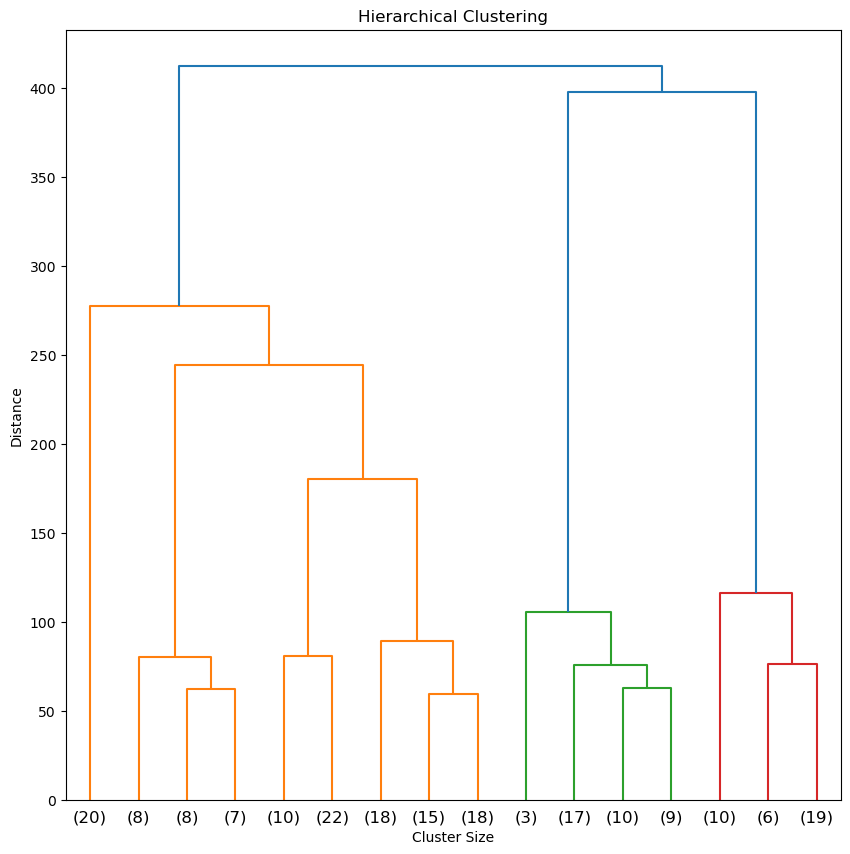

In [18]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
dendrogram(l,p=16,truncate_mode="lastp")
plt.title("Hierarchical Clustering")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

In [20]:
# Agglomerative Clustering 
from sklearn.cluster import AgglomerativeClustering

In [29]:
cl=AgglomerativeClustering(n_clusters=3)

In [30]:
#Here the default value is 2
cl.fit_predict(a)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

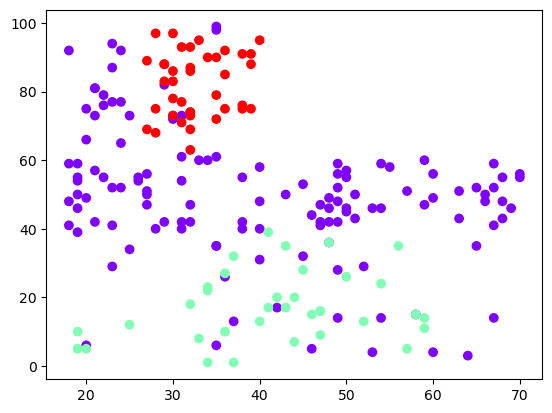

In [31]:
# Lets plot them and see how cluster are distributed
plt.scatter(a["Age"],a["Spending Score (1-100)"],c=cl.labels_,cmap="rainbow")

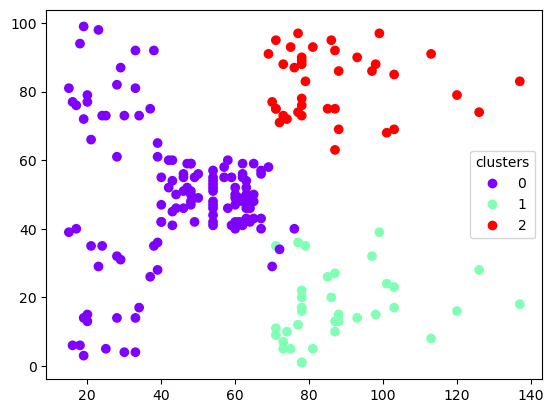

In [36]:
fig,ax=plt.subplots()
sr=ax.scatter(a["Annual Income (k$)"],a["Spending Score (1-100)"],c=cl.labels_,cmap="rainbow")
ax.legend(*sr.legend_elements(),title="clusters")